In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

#### Empezamos a crear todo desde cero. Creamos los ejemplos

In [4]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean = None,
                        cov = 0.1,
                        n_samples = N,
                        n_features = 2,
                        n_classes = 2,
                        shuffle = True,
                        random_state=None
                       )

X, Y = gaussian_quantiles

In [5]:
Y = Y[:, np.newaxis]

#### Funciones de activación

In [7]:
# Función de activación ReLU
def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

# Funcion de activación Sigmoide
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

#### Función de pérdida

In [8]:
# Función de pérdida MSE
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

### Función de inicialización de parámetros

In [37]:
def initialize_parameters_dl(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0, L - 1):
        parameters[f'W{str(l+1)}'] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) - 1
        parameters[f'b{str(l+1)}'] = (np.random.rand(1,layers_dim[l+1]) * 2) - 1
    
    return parameters

#### Problema a resolver con la red neuronal

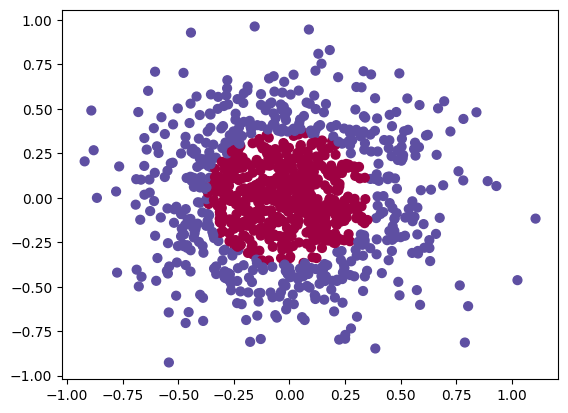

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

In [17]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0, L-1):
        parameters[f'W{str(l+1)}'] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) - 1
        parameters[f'b{str(l+1)}'] = (np.random.rand(1,layers_dim[l+1]) * 2) - 1
    return parameters

In [20]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)

In [21]:
params

{'W1': array([[-0.2263818 ,  0.5637902 ,  0.64016882,  0.71458888],
        [-0.22065369,  0.35061798,  0.6435769 ,  0.52104729]]),
 'b1': array([[-2.87509628e-04,  5.21723101e-01,  8.62660281e-01,
          6.91676369e-01]]),
 'W2': array([[-0.49498107,  0.60291964,  0.56240088, -0.27321447, -0.29945885,
          0.99802217, -0.22243516,  0.45432887],
        [ 0.32501176, -0.46132905,  0.33540263, -0.51331918, -0.49072752,
          0.41146656,  0.93137857,  0.12454228],
        [-0.03783608, -0.58643098,  0.76357113,  0.83973359,  0.47860961,
          0.20257419,  0.5308833 ,  0.63302083],
        [-0.40460713,  0.68153104, -0.51388701, -0.57960946, -0.38590342,
         -0.93833829,  0.40710999, -0.81861921]]),
 'b2': array([[-0.71150114, -0.77015041, -0.74155791, -0.32398249,  0.51603802,
          0.7506151 ,  0.63752352, -0.41964768]]),
 'W3': array([[-0.55821499],
        [ 0.39971674],
        [ 0.40809995],
        [ 0.26070286],
        [-0.67783923],
        [ 0.43546088]

In [23]:
params['W1'].shape

(2, 4)

In [24]:
X.shape

(1000, 2)

In [25]:
np.matmul(X, params['W1']).shape #producto punto

(1000, 4)

In [28]:
(X@params['W1']).shape #producto punto de otra manera

(1000, 4)

### Función de entrenamiento

In [34]:
def train(x_data, lr, params, training = True):

    # Capas en Forward
    params['A0'] = x_data

    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    # print(output.shape)

    if training:
        # Backpropagation
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        # Gradient Descent
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

### Entrenando la red

In [ ]:
layers_dims = [2,4,8,1]
LR = 0.0001
params = initialize_parameters_dl(layers_dims)
errors = []

for _ in range(30000):
    output = train(X,LR,params)
    if _ % 100 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))


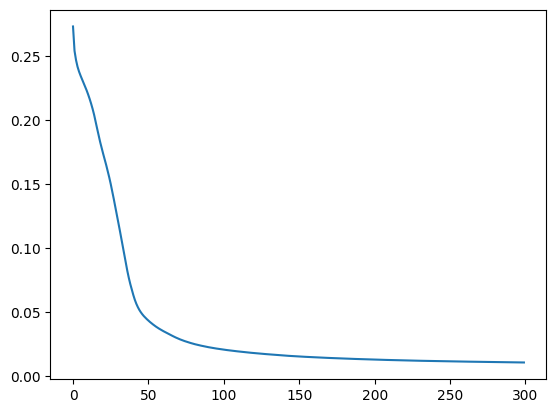

In [42]:
plt.plot(errors)

##### Probando sobre datos nuevos

In [44]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,LR,params,training=False)

In [45]:
y = np.where(y >= 0.5, 1, 0)

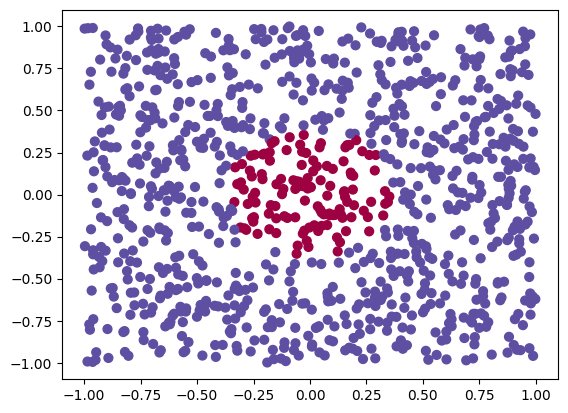

In [47]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral)